<a href="https://colab.research.google.com/github/Harshavardhan88/Elevatelabs-internship/blob/main/ELEVATELABS-TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries and Load Dataset

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
df = pd.read_csv('titanic.csv')

# Step 2: Explore and Understand the Data

In [10]:
print("Dataset Shape:", df.shape)
print("\nDataset Information:")
print(df.info())
print("\nDataset Summary Statistics:")
print(df.describe())
print("\nMissing Values per Column:")
print(df.isnull().sum())
print(df.head())

Dataset Shape: (891, 12)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Dataset Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0

# Step 3: Visualize the Data

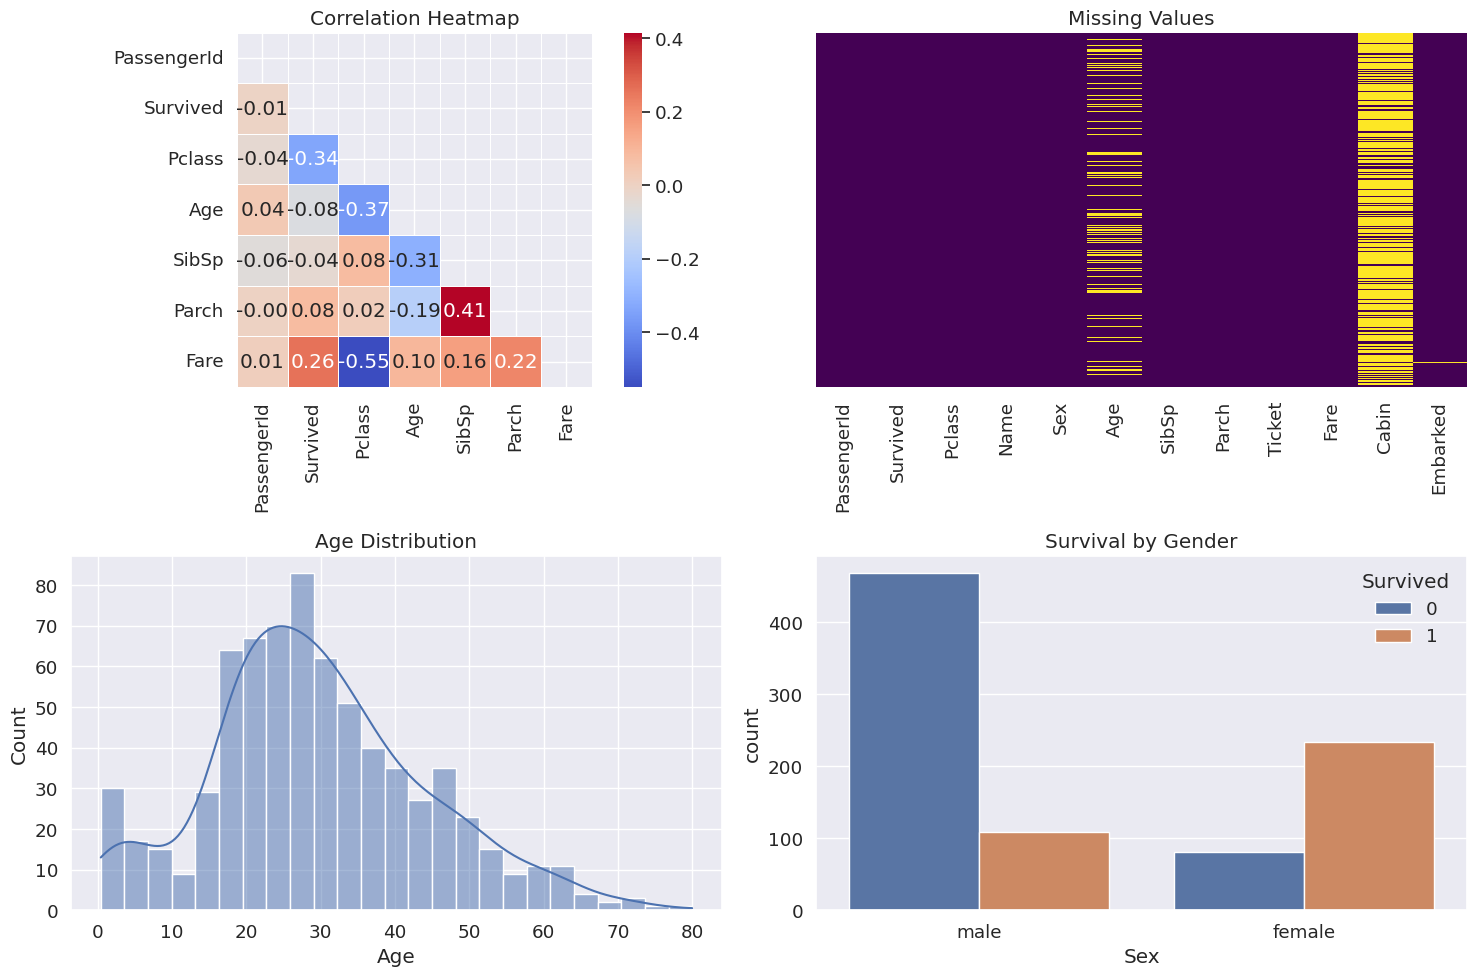

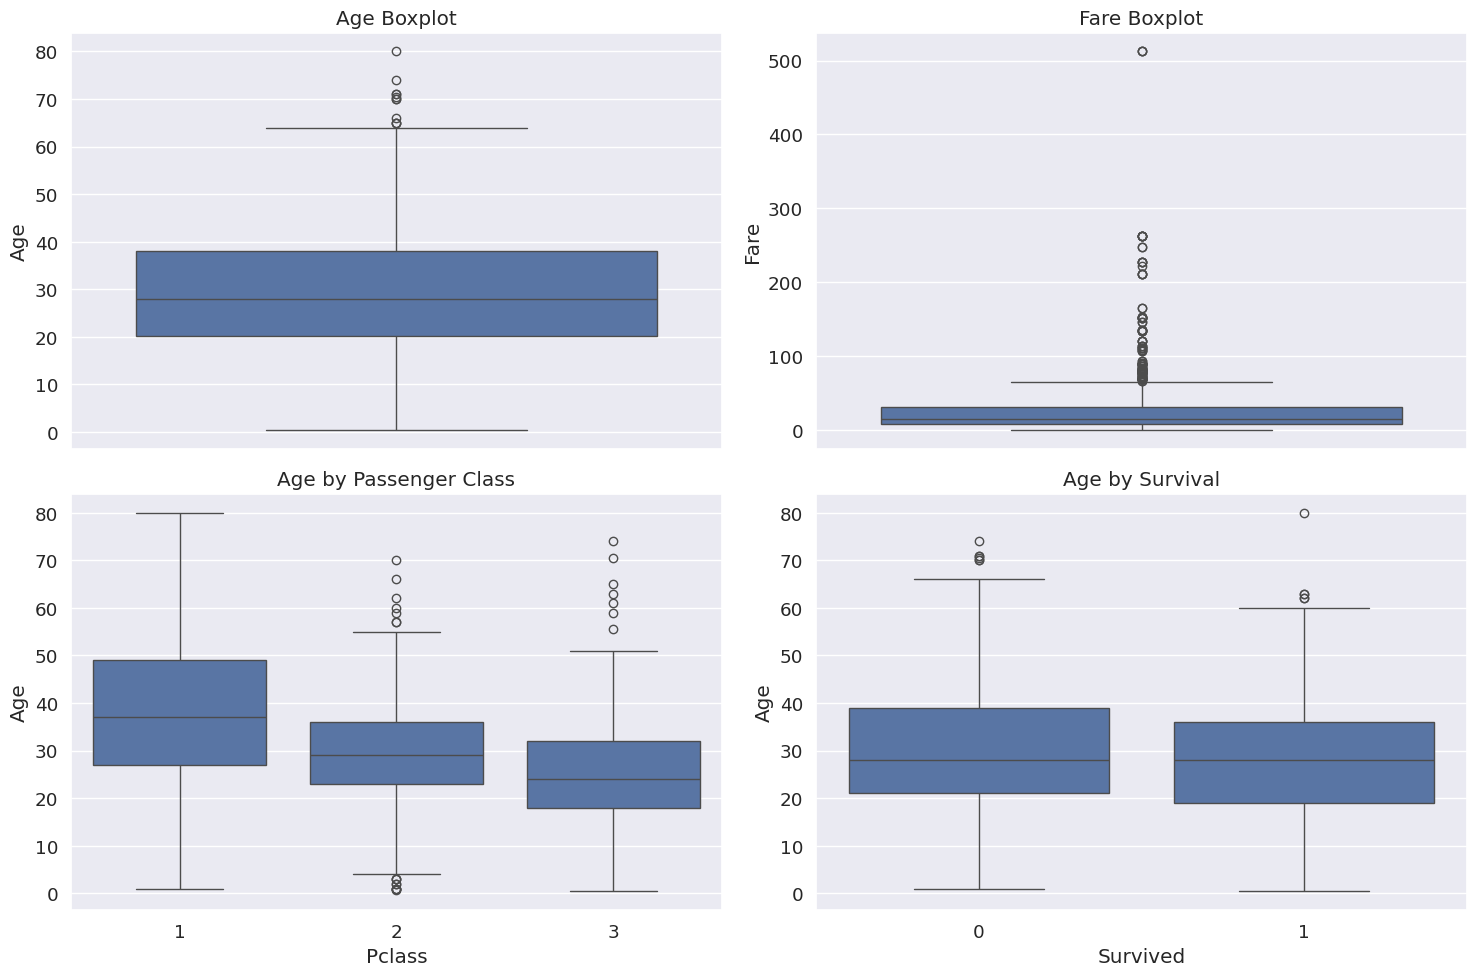

In [11]:
plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
corr = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap')

plt.subplot(2, 2, 2)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values')


plt.subplot(2, 2, 3)
sns.histplot(df['Age'].dropna(), kde=True, bins=25)
plt.title('Age Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')

plt.tight_layout()
plt.savefig('data_exploration.png')
plt.show()
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y='Age', data=df)
plt.title('Age Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(y='Fare', data=df)
plt.title('Fare Boxplot')
plt.subplot(2, 2, 3)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age by Passenger Class')

plt.subplot(2, 2, 4)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age by Survival')

plt.tight_layout()
plt.savefig('outliers_analysis.png')
plt.show()


# Step 4: Data Cleaning & Preprocessing

Dataset Shape: (891, 12)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket      

Text(0.5, 1.0, 'Fare Distribution Before Outlier Removal')

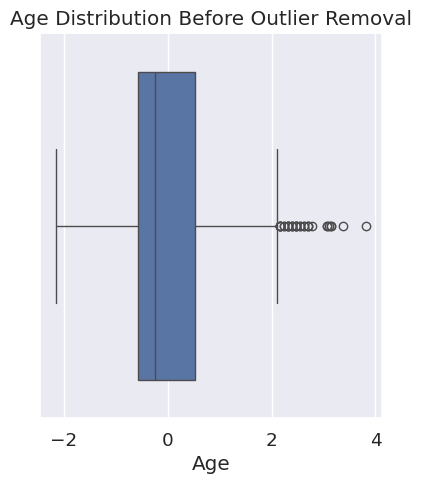

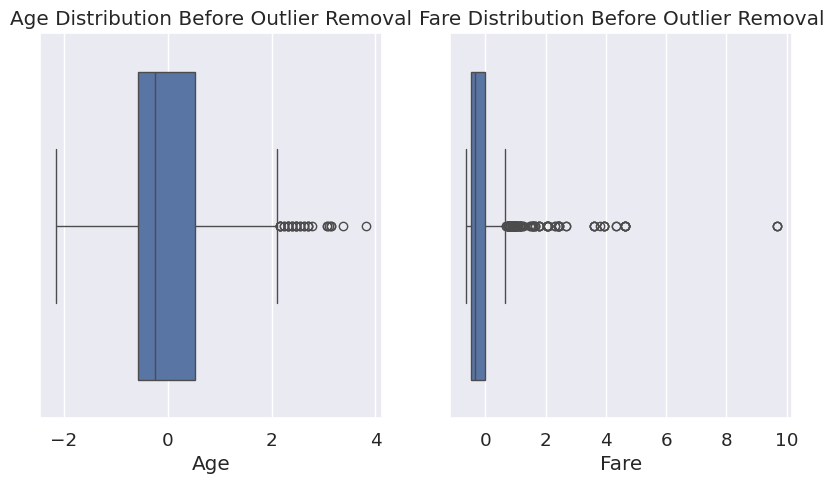

In [21]:
df_clean = df.copy()

print("Dataset Shape:", df_clean.shape)
print("\nDataset Information:")
print(df_clean.info())
print("\nMissing Values per Column:")
print(df_clean.isnull().sum())
print("\nSample Data:")
print(df_clean.head())


df_clean['Age'] = df_clean.groupby(['Pclass', 'Sex'])['Age'].transform(
    lambda x: x.fillna(x.median()) if not pd.isna(x.median()) else x.fillna(df_clean['Age'].median())
)


most_common_port = df_clean['Embarked'].mode()[0]
df_clean['Embarked'] = df_clean['Embarked'].fillna(most_common_port)


df_clean['Cabin'] = df_clean['Cabin'].fillna('Unknown')

df_clean['Fare'] = df_clean.groupby('Pclass')['Fare'].transform(
    lambda x: x.fillna(x.median())
)

df_clean['Sex'] = df_clean['Sex'].map({'male': 1, 'female': 0})


df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
    'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
    'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs',
    'Capt': 'Rare', 'Sir': 'Rare'
}
df_clean['Title'] = df_clean['Title'].map(title_mapping)


title_dummies = pd.get_dummies(df_clean['Title'], prefix='Title')
df_clean = pd.concat([df_clean, title_dummies], axis=1)


embarked_dummies = pd.get_dummies(df_clean['Embarked'], prefix='Embarked')
df_clean = pd.concat([df_clean, embarked_dummies], axis=1)


numerical_features = ['Age', 'Fare']
scaler = StandardScaler()
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df_clean['Age'])
plt.title('Age Distribution Before Outlier Removal')

df_clean = df.copy()

print("Dataset Shape:", df_clean.shape)
print("\nDataset Information:")
print(df_clean.info())
print("\nMissing Values per Column:")
print(df_clean.isnull().sum())
print("\nSample Data:")
print(df_clean.head())


df_clean['Age'] = df_clean.groupby(['Pclass', 'Sex'])['Age'].transform(
    lambda x: x.fillna(x.median()) if not pd.isna(x.median()) else x.fillna(df_clean['Age'].median())
)

most_common_port = df_clean['Embarked'].mode()[0]
df_clean['Embarked'] = df_clean['Embarked'].fillna(most_common_port)

df_clean['Cabin'] = df_clean['Cabin'].fillna('Unknown')

df_clean['Fare'] = df_clean.groupby('Pclass')['Fare'].transform(
    lambda x: x.fillna(x.median())
)

df_clean['Sex'] = df_clean['Sex'].map({'male': 1, 'female': 0})

df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
    'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
    'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs',
    'Capt': 'Rare', 'Sir': 'Rare'
}
df_clean['Title'] = df_clean['Title'].map(title_mapping)

title_dummies = pd.get_dummies(df_clean['Title'], prefix='Title')
df_clean = pd.concat([df_clean, title_dummies], axis=1)

embarked_dummies = pd.get_dummies(df_clean['Embarked'], prefix='Embarked')
df_clean = pd.concat([df_clean, embarked_dummies], axis=1)

numerical_features = ['Age', 'Fare']
scaler = StandardScaler()
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df_clean['Age'])
plt.title('Age Distribution Before Outlier Removal')

plt.subplot(1, 3, 2)
sns.boxplot(x=df_clean['Fare'])
plt.title('Fare Distribution Before Outlier Removal')